In [1]:
from treecalculator import TreeCalculator
from treemodel import TreeModel
import pickle
import cv2
import numpy as np
from skimage.filters.rank import entropy, mean
from skimage.morphology import square

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [5]:
ada_model = pickle.load(open('TrainedModelManualZoom16.p', 'rb'))
images = pickle.load(open('images-lausanne-zoom-16.p', 'rb'))['sat']

tree_model = TreeModel(ada_model)

tree_calculator = TreeCalculator(tree_model)

In [6]:
results = {
    'sat': [],
    'pred': []
}

for i, img in enumerate(images):
    pred = tree_model.predict_proba(images[i])
    thresh = tree_calculator.threshold_image(tree_calculator.filter_image(pred))
    results['sat'].append(img)
    results['pred'].append(thresh)
    print('Processed image {}/{}'.format(i+1, len(images)))

C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\satfunctions.py:16: RuntimeWarning: divide by zero encountered in log
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\satfunctions.py:16: RuntimeWarning: invalid value encountered in subtract
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\satfunctions.py:17: RuntimeWarning: divide by zero encountered in log
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Processed image 1/702


C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\satfunctions.py:17: RuntimeWarning: invalid value encountered in subtract
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))


Processed image 2/702
Processed image 3/702
Processed image 4/702
Processed image 5/702
Processed image 6/702
Processed image 7/702
Processed image 8/702
Processed image 9/702
Processed image 10/702
Processed image 11/702
Processed image 12/702
Processed image 13/702
Processed image 14/702
Processed image 15/702
Processed image 16/702
Processed image 17/702
Processed image 18/702
Processed image 19/702
Processed image 20/702
Processed image 21/702
Processed image 22/702
Processed image 23/702
Processed image 24/702
Processed image 25/702
Processed image 26/702
Processed image 27/702
Processed image 28/702
Processed image 29/702
Processed image 30/702
Processed image 31/702
Processed image 32/702
Processed image 33/702
Processed image 34/702
Processed image 35/702
Processed image 36/702
Processed image 37/702
Processed image 38/702
Processed image 39/702
Processed image 40/702
Processed image 41/702
Processed image 42/702
Processed image 43/702
Processed image 44/702
Processed image 45/

Processed image 348/702
Processed image 349/702
Processed image 350/702
Processed image 351/702
Processed image 352/702
Processed image 353/702
Processed image 354/702
Processed image 355/702
Processed image 356/702
Processed image 357/702
Processed image 358/702
Processed image 359/702
Processed image 360/702
Processed image 361/702
Processed image 362/702
Processed image 363/702
Processed image 364/702
Processed image 365/702
Processed image 366/702
Processed image 367/702
Processed image 368/702
Processed image 369/702
Processed image 370/702
Processed image 371/702
Processed image 372/702
Processed image 373/702
Processed image 374/702
Processed image 375/702
Processed image 376/702
Processed image 377/702
Processed image 378/702
Processed image 379/702
Processed image 380/702
Processed image 381/702
Processed image 382/702
Processed image 383/702
Processed image 384/702
Processed image 385/702
Processed image 386/702
Processed image 387/702
Processed image 388/702
Processed image 

Processed image 690/702
Processed image 691/702
Processed image 692/702
Processed image 693/702
Processed image 694/702
Processed image 695/702
Processed image 696/702
Processed image 697/702
Processed image 698/702
Processed image 699/702
Processed image 700/702
Processed image 701/702
Processed image 702/702


In [7]:
pickle.dump(results, open('PredictedDataLausanne16.p', 'wb'))

In [36]:
sparsities = []
for pred in results['pred']:
    ret, thresh_entropy = cv2.threshold(entropy(pred, square(10)), 0.5, 1, cv2.THRESH_BINARY)
    entropy_zero_count = np.count_nonzero(thresh_entropy)
    sparsity = np.count_nonzero(pred) / entropy_zero_count if entropy_zero_count > 0 else 1
    sparsity /= pred.size
    sparsities.append(sparsity)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


5.456535946548883e-06
[685 106 141]
[1.46621476e-06 1.48386195e-06 1.63503782e-06]
[189 185 190]
[2.40826639e-05 2.59718748e-05 2.69618208e-05]


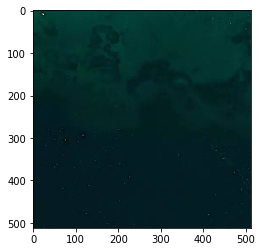

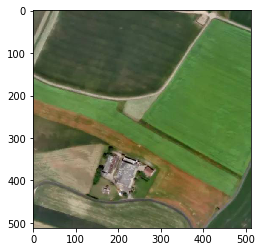

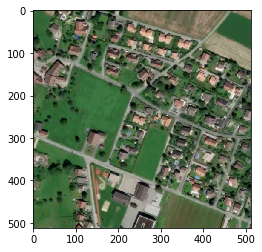

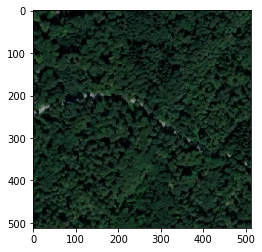

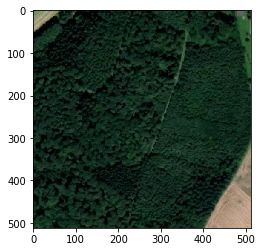

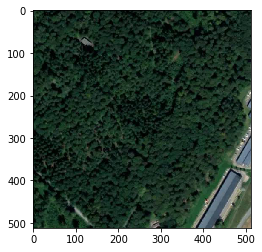

In [49]:
sorted_sparsities = np.argsort(sparsities)

print(np.mean(sparsities))

print(sorted_sparsities[:3])
print(np.array(sparsities)[sorted_sparsities[:3]])
for img in np.array(images)[sorted_sparsities[:3]]:
    plt.figure()
    plt.imshow(img)
    
    
print(sorted_sparsities[-3:])
print(np.array(sparsities)[sorted_sparsities[-3:]])
for img in np.array(images)[sorted_sparsities[-3:]]:
    plt.figure()
    plt.imshow(img)

In [45]:
pred = tree_model.predict_proba(images[189])

C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: divide by zero encountered in log
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: invalid value encountered in subtract
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: divide by zero encountered in log
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: invalid value encountered in subtract
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


244621
38748
2.408266387463748e-05


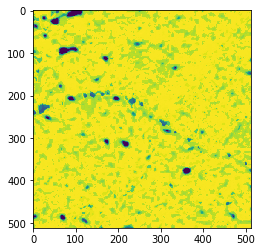

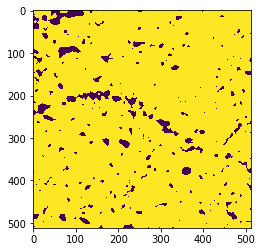

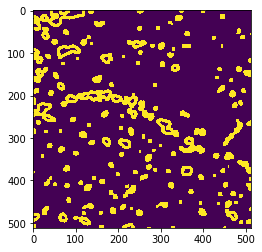

In [48]:
plt.imshow(pred)
thresh = tree_calculator.threshold_image(tree_calculator.filter_image(pred))
plt.figure()
plt.imshow(thresh)


ret, thresh_entropy = cv2.threshold(entropy(thresh, square(10)), 0.5, 1, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thresh_entropy)

sparsity = np.count_nonzero(thresh) / np.count_nonzero(thresh_entropy)
print(np.count_nonzero(thresh))
print(np.count_nonzero(thresh_entropy))
print(sparsity / 512 / 512)

In [8]:
pred_1 = tree_model.predict_proba(images[0])
thresh_1 = tree_calculator.threshold_image(tree_calculator.filter_image(pred_1))
pred_2 = tree_model.predict_proba(images[2])
thresh_2 = tree_calculator.threshold_image(tree_calculator.filter_image(pred_2))

C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: divide by zero encountered in log
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: invalid value encountered in subtract
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: divide by zero encountered in log
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: invalid value encountered in subtract
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))


In [33]:
%%time
# print(np.mean(entropy(thresh_1, square(16))))
# print(np.mean(entropy(thresh_2, square(16))))
# print(np.count_nonzero(entropy(thresh_1, square(16))))
# print(np.count_nonzero(entropy(thresh_2, square(16))))
ret, thresh_entropy_1 = cv2.threshold(entropy(thresh_1, square(10)), 0.5, 1, cv2.THRESH_BINARY)
# ret, thresh_entropy_2 = cv2.threshold(entropy(thresh_2, square(10)), 0.5, 1, cv2.THRESH_BINARY)
# thresh_entropy_1 = entropy(thresh_1, square(16))
# thresh_entropy_2 = entropy(thresh_2, square(16))
sparsity = np.count_nonzero(thresh_1) / np.count_nonzero(thresh_entropy_1)
print(sparsity / 512 / 512)
# print(np.count_nonzero(thresh_2) / np.count_nonzero(thresh_entropy_2))

1.9877050409824825e-06
Wall time: 119 ms


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
